# Price Prediction for second hand cars in Germant

## Steps of the Project:
1-EDA (Exploratory Data Analysis)

2-Feature Engineering

3-Data Preprocessing

4-Modeling 

  4-1-Model Selection
  
  4-2-Model Evaluation
  
  4-3-Model Tuning

5-Visualization 

4- Results 

In [77]:
# Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mpl_toolkits
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## 1-EDA (Exploratory Data Analysis)

In [78]:
# Loading Dataset
df = pd.read_csv('car_data.csv')

In [79]:
df.head(3)

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300,148,201,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB
1,1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900,191,260,Manual,Petrol,NaN,- (g/km),190000.0,"Q4 Allrad, 3.2L GTA"
2,2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900,110,150,Unknown,Petrol,NaN,- (g/km),129000.0,ALFA ROME 916


In [80]:
df

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300,148,201,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB
1,1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900,191,260,Manual,Petrol,NaN,- (g/km),190000.0,"Q4 Allrad, 3.2L GTA"
2,2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900,110,150,Unknown,Petrol,NaN,- (g/km),129000.0,ALFA ROME 916
3,3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,189500.0,2.0 16V Twin Spark L
4,4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950,132,179,Manual,Petrol,"7,2 l/100 km",- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251074,251074,volvo,Volvo XC40,white,04/2023,2023,57990,192,261,Automatic,Hybrid,NaN,43 km Reichweite,1229.0,Plus Bright T5 Recharge Intellisafe*Surround+P...
251075,251075,volvo,Volvo XC90,white,03/2023,2023,89690,173,235,Automatic,Diesel,"7,6 l/100 km",202 g/km,4900.0,B5 AWD Diesel Ultimate Dark 7-Sitzer Massage F...
251076,251076,volvo,Volvo V60,white,05/2023,2023,61521,145,197,Automatic,Diesel,"4,7 l/100 km",125 g/km,1531.0,"B4 D Plus Dark 145 kW, 5-türig (Diesel)"
251077,251077,volvo,Volvo XC40,white,05/2023,2023,57890,132,179,Automatic,Hybrid,NaN,45 km Reichweite,1500.0,T5 Recharge Plus Dark *Standh*360°*beh.Lenk


In [82]:
df.info

<bound method DataFrame.info of         Unnamed: 0       brand              model  color registration_date  \
0                0  alfa-romeo     Alfa Romeo GTV    red           10/1995   
1                1  alfa-romeo     Alfa Romeo 164  black           02/1995   
2                2  alfa-romeo  Alfa Romeo Spider  black           02/1995   
3                3  alfa-romeo  Alfa Romeo Spider  black           07/1995   
4                4  alfa-romeo     Alfa Romeo 164    red           11/1996   
...            ...         ...                ...    ...               ...   
251074      251074       volvo         Volvo XC40  white           04/2023   
251075      251075       volvo         Volvo XC90  white           03/2023   
251076      251076       volvo          Volvo V60  white           05/2023   
251077      251077       volvo         Volvo XC40  white           05/2023   
251078      251078       volvo         Volvo XC40   gold           03/2023   

        year price_in_euro powe

In [81]:
df.describe

<bound method NDFrame.describe of         Unnamed: 0       brand              model  color registration_date  \
0                0  alfa-romeo     Alfa Romeo GTV    red           10/1995   
1                1  alfa-romeo     Alfa Romeo 164  black           02/1995   
2                2  alfa-romeo  Alfa Romeo Spider  black           02/1995   
3                3  alfa-romeo  Alfa Romeo Spider  black           07/1995   
4                4  alfa-romeo     Alfa Romeo 164    red           11/1996   
...            ...         ...                ...    ...               ...   
251074      251074       volvo         Volvo XC40  white           04/2023   
251075      251075       volvo         Volvo XC90  white           03/2023   
251076      251076       volvo          Volvo V60  white           05/2023   
251077      251077       volvo         Volvo XC40  white           05/2023   
251078      251078       volvo         Volvo XC40   gold           03/2023   

        year price_in_euro po

#### TODO:
Check how data is cleaned here:
https://www.kaggle.com/code/scarfsman/german-used-cars-data-cleaning-eda

In [88]:
# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())

# Drop rows with missing values
data.dropna(inplace=True)


Missing values:
Unnamed: 0                      0
brand                           0
model                           0
color                         166
registration_date               4
year                            0
price_in_euro                   0
power_kw                      134
power_ps                      129
transmission_type               0
fuel_type                       0
fuel_consumption_l_100km    26873
fuel_consumption_g_km           0
mileage_in_km                 152
offer_description               1
dtype: int64


In [89]:
# listing features
df.columns

Index(['Unnamed: 0', 'brand', 'model', 'color', 'registration_date', 'year',
       'price_in_euro', 'power_kw', 'power_ps', 'transmission_type',
       'fuel_type', 'fuel_consumption_l_100km', 'fuel_consumption_g_km',
       'mileage_in_km', 'offer_description'],
      dtype='object')

In [94]:
# renaming and dropping some columns 
df.rename(columns={"price_in_euro": "price"}, inplace=True)
df.drop(columns=['Unnamed: 0'], inplace=True)

In [98]:
df.columns

Index(['brand', 'model', 'color', 'registration_date', 'year', 'price',
       'power_kw', 'power_ps', 'transmission_type', 'fuel_type',
       'fuel_consumption_l_100km', 'fuel_consumption_g_km', 'mileage_in_km',
       'offer_description'],
      dtype='object')

In [99]:
#checking data type of the columns
for col in ['brand', 'model', 'color', 'registration_date', 'year', 'price',
       'power_kw', 'power_ps', 'transmission_type', 'fuel_type',
       'fuel_consumption_l_100km', 'fuel_consumption_g_km', 'mileage_in_km',
       'offer_description']:
    print(df[col].dtype)

object
object
object
object
object
object
object
object
object
object
object
object
float64
object


In [101]:
"""we select the following features w numerical values
to be considered against the price"""
numerical_cols = ['year','price','power_kw', 'fuel_consumption_g_km',
       'mileage_in_km'] 
print(numerical_cols)

['year', 'price', 'power_kw', 'fuel_consumption_g_km', 'mileage_in_km']


In [102]:
"""Defining list of categorical features"""
categorical_cols = ['brand', 'model', 'fuel_type']

### Anomolies and Outliars detection via matplotlib visualization
For visual inspections, we plot histograms for numerical features and bar plots for categorical features

#### TODO:
How to plot bar categorical columns? Below doesn't work...

In [105]:
"""
plt.figure(figsize=(10,6))
plt.bar(df['brand'],df[''])
plt.title('Number of Cars per Model')
plt.xlabel('model')
plt.ylabel('Number of Cars')
plt.show()
"""

"\nplt.figure(figsize=(10,6))\nplt.bar(df['brand'],df[''])\nplt.title('Number of Cars per Model')\nplt.xlabel('model')\nplt.ylabel('Number of Cars')\nplt.show()\n"

#### TODO:
Fix below!

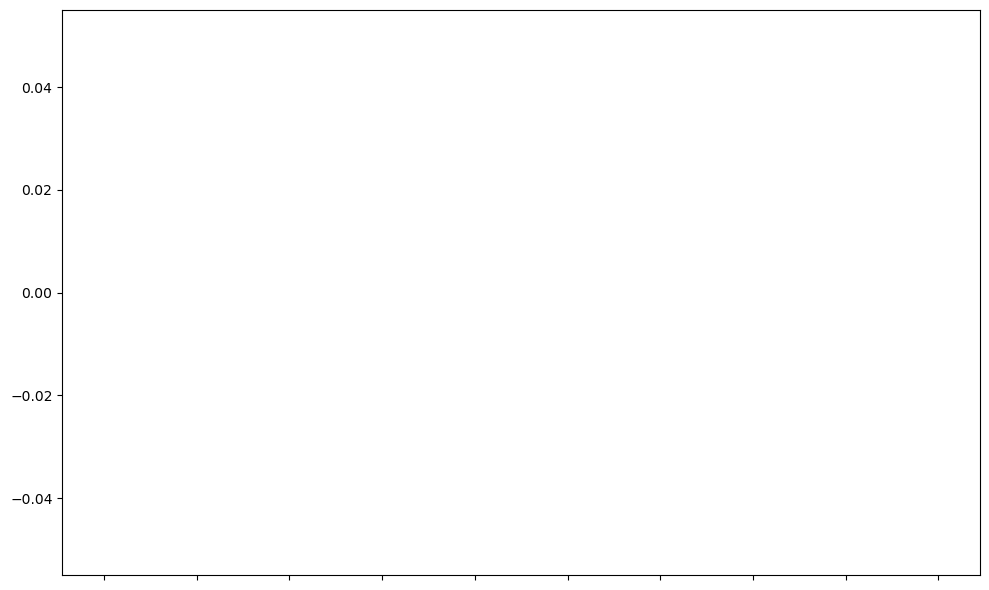

In [122]:
plt.figure(figsize=(10, 6))
plt.hist(df['year'], bins=np.arange(1980, 2026, 5), alpha=0.7)
years = np.arange(1980, 2026, 5)
plt.xticks(years, rotation=45)
plt.tight_layout()
plt.show()

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([1980.  , 1980.42, 1980.84, 1981.26, 1981.68, 1982.1 , 1982.52,
        1982.94, 1983.36, 1983.78, 1984.2 , 1984.62, 1985.04, 1985.46,
        1985.88, 1986.3 , 1986.72, 1987.14, 1987.56, 1987.98, 1988.4 ,
        1988.82, 1989.24, 1989.66, 1990.08, 1990.5 , 1990.92, 1991.34,
        1991.76, 1992.18, 1992.6 , 1993.02, 1993.44, 1993.86, 1994.28,
        1994.7 , 1995.12, 1995.54, 1995.96, 1996.38, 1996.8 , 1997.22,
        1997.64, 1998.06, 1998.48, 1998.9 , 1999.32, 1999.74, 2000.16,
        2000.58, 2001.  , 2001.42, 2001.84, 2002.26, 

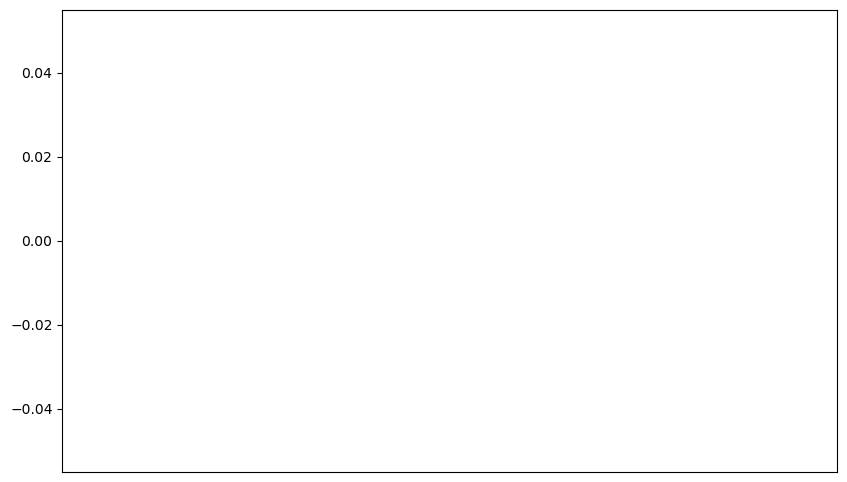

In [121]:
plt.figure(figsize=(10,6))
plt.hist(df['year'], 100, range=[1980, 2022])
#plt.title("Number of Cars per Selected Features")
#plt.xlabel('year')
#plt.ylabel("Number of Cars")

#### TODO
The above diagram shows that there are very few data for cars older than certain age. So perhaps we can delete them?

Text(0, 0.5, 'Number of Cars')

/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


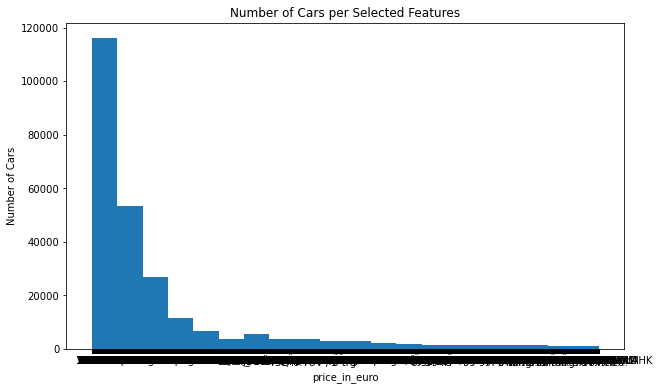

In [50]:
plt.figure(figsize=(10,6))
plt.hist(df['price'],bins=20)
plt.title("Number of Cars per Selected Features")
plt.xlabel('price')
plt.ylabel("Number of Cars")

TypeError: 'value' must be an instance of str or bytes, not a float

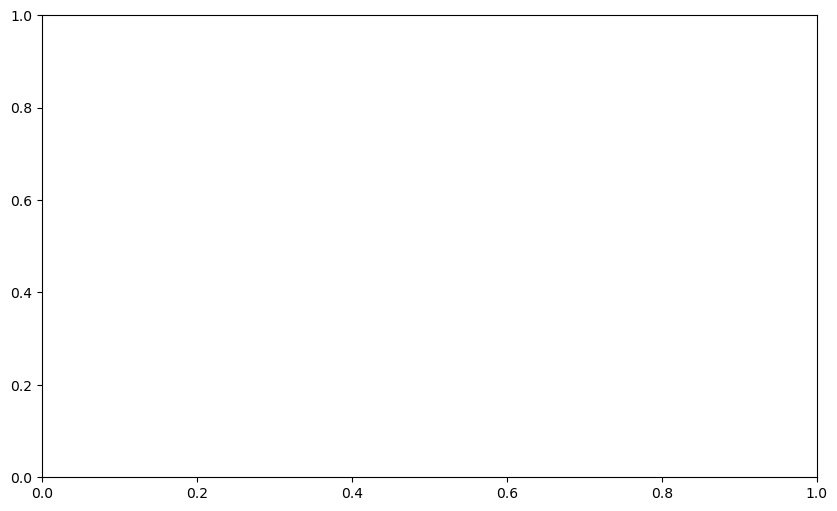

In [123]:
plt.figure(figsize=(10,6))
plt.hist(df['power_kw'],bins=20)
plt.title("Number of Cars per Selected Features")
plt.xlabel('power_kw')
plt.ylabel("Number of Cars")

#### TODO
Above error happend because some elements in the power_kw column were of type float. One solution is to change the type into string as follows. Is this a good idea? 
##### NO: later str type produces problem; suggestion: First clean the file with dropna, etc. and then plot again

Text(0, 0.5, 'Number of Cars')

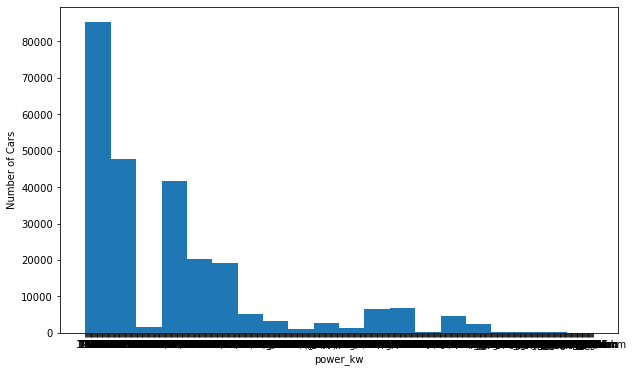

In [105]:
data['power_kw'] = data['power_kw'].astype(str)
plt.figure(figsize=(10,6))
plt.hist(d,bins=20)
plt.xlabel('power_kw')
plt.ylabel('Number of Cars')

Text(0, 0.5, 'Number of Cars')

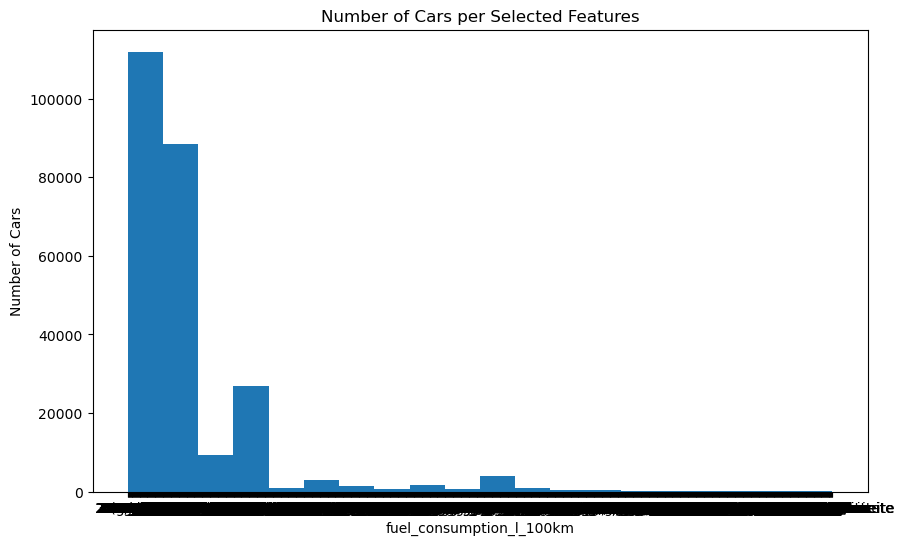

In [134]:
plt.figure(figsize=(10,6))
plt.hist(df['fuel_consumption_g_km'],bins=20)
plt.title("Number of Cars per Selected Features")
plt.xlabel('fuel_consumption_l_100km')
plt.ylabel("Number of Cars")

In [132]:
numerical_cols

['year', 'price', 'power_kw', 'fuel_consumption_g_km', 'mileage_in_km']

Text(0, 0.5, 'Number of Cars')

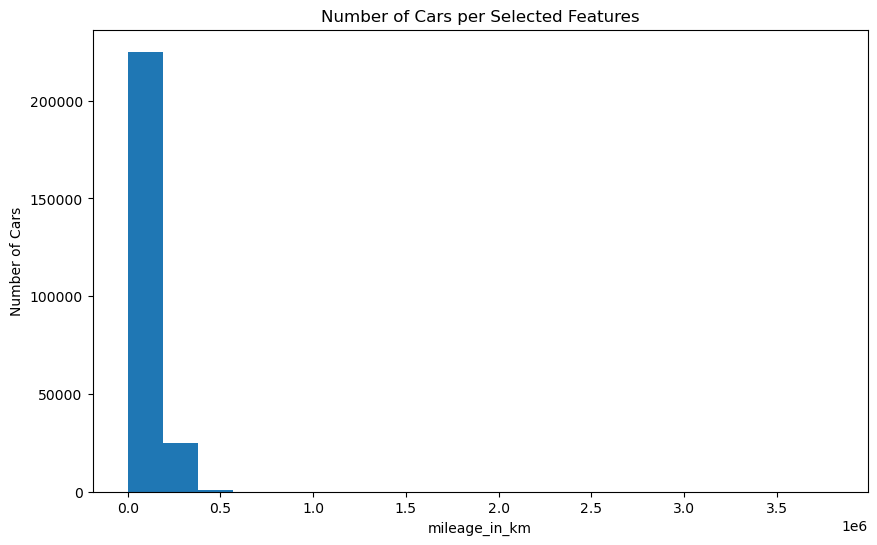

In [135]:
plt.figure(figsize=(10,6))
plt.hist(df['mileage_in_km'],bins=20)
plt.title("Number of Cars per Selected Features")
plt.xlabel('mileage_in_km')
plt.ylabel("Number of Cars")

In [136]:
print(numerical_cols,categorical_cols)

['year', 'price', 'power_kw', 'fuel_consumption_g_km', 'mileage_in_km'] ['brand', 'model', 'fuel_type']


In [138]:
#trying scattered plot of price vs other selected features does not give much info because of huge amoung of points

plt.figure(figsize=(10,6))
plt.scatter(data['price'], data['year'])
plt.title("Price vs year")
plt.xlabel('price')
plt.ylabel('year')
plt.show()

KeyError: 'price'

<Figure size 1000x600 with 0 Axes>

### Featuer Engineering

In [62]:
# since we changed type of some columns, let's reread the dataset
data = pd.read_csv('car_data.csv')

In [63]:
"""we select the following features w numerical calues
to be considered against price"""
numerical_cols = ['model', 'year','price','power_kw', 'fuel_consumption_g_km',
       'mileage_in_km'] 
print(type(numerical_cols),numerical_cols)

<class 'list'> ['model', 'year', 'price_in_euro', 'power_kw', 'fuel_consumption_g_km', 'mileage_in_km']


In [64]:
numerical_cols = numerical_cols.remove('price_in_euro')
print(type(numerical_cols),numerical_cols)

<class 'NoneType'> None


In [58]:
# Convert 'price' column to numeric
data['price_in_euro'] = pd.to_numeric(data['price_in_euro'], errors='coerce')

# Remove duplicate rows
data.drop_duplicates(inplace=True)

# Summary statistics
print("\nSummary statistics:")
print(data.describe())


Summary statistics:
          Unnamed: 0  price_in_euro  mileage_in_km
count  223836.000000   2.237330e+05   2.238360e+05
mean   125630.622130   2.515345e+04   8.749976e+04
std     72797.661024   3.491210e+04   7.913192e+04
min         0.000000   1.200000e+02   0.000000e+00
25%     62734.500000   1.169000e+04   2.668000e+04
50%    125453.500000   1.930000e+04   7.020000e+04
75%    189012.250000   2.899900e+04   1.300000e+05
max    251076.000000   5.890500e+06   3.800000e+06


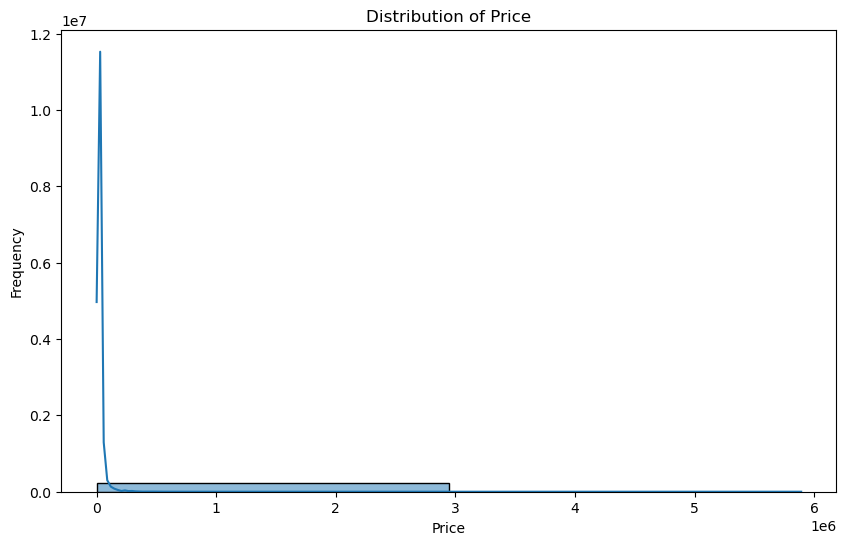

In [59]:
# Histogram of 'price' column
plt.figure(figsize=(10, 6))
sns.histplot(data['price_in_euro'], bins=2, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [61]:
#print(type(numerical_cols))
# print(numerical_cols)
numerical_cols

In [42]:
for col in numerical_cols:
    plt.figure(figsize=(10,6))
    plt.scatter(data['price_in_euro'], data[col])
    plt.title("Number of Cars per Selected Features")
    plt.xlabel('price')
    plt.ylabel(numerical_cols[col])

TypeError: 'NoneType' object is not iterable

## 2-Modeling 

## Splitting the Data Set

#### TODO:
What is the target feature?

In [16]:
# Splitting the data into training and testing datasets
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = data.drop(columns=['city'])  # Assuming 'city' is the target variable
y = data['city']
print(X["city"])
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

KeyError: 'city'

## Linear Regression

In [1]:
# This is how to use functions from another jupyter notebook:
%run regression.ipynb
test()

successful ran test function from the regression notebook


## Boosting

## KNN

In [ ]:
# Training the KNN model
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors as needed

In [ ]:
# Training the KNN model
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Testing the KNN model
# Predictions on the testing set
knn_predictions = knn.predict(X_test)

In [ ]:
# Evaluating the KNN model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Accuracy score
knn_accuracy = accuracy_score(y_test)

In [17]:
_test, knn_predictions)
print("KNN Accuracy:", knn_accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(Y_test, knn_predictions))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, knn_predictions))

NameError: name 'y_train' is not defined

  
  ##  Random Forest
  

In [ ]:
# Training the random forest model
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of estimators as needed

# Train the model on the training data
rf.fit(X_train, y_train)


# Testing the Random Forest model
# Predictions on the testing set
rf_predictions = rf.predict(X_test)

# Evaluating the Random Forest model
# Accuracy score
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, rf_predictions))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))

 ##    Decision Tree

  ## Train/Test

## Cross-Validation

In [ ]:
# K-Fold cross-validation with KNN modeling
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors as needed

# Define the number of folds for cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform K-Fold cross-validation
knn_cv_scores = cross_val_score(knn, X, y, cv=kfold)

# Print the cross-validation scores
print("KNN Cross-Validation Scores:", knn_cv_scores)

# Calculate and print the mean accuracy score
print("Mean Accuracy:", knn_cv_scores.mean())

# K-Fold Cross-Validation with Random Forest modeling
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of estimators as needed

# Define the number of folds for cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform K-Fold cross-validation
rf_cv_scores = cross_val_score(rf, X, y, cv=kfold)

# Print the cross-validation scores
print("Random Forest Cross-Validation Scores:", rf_cv_scores)

# Calculate and print the mean accuracy score
print("Mean Accuracy:", rf_cv_scores.mean())

## Error Metrics

In [ ]:
# Error Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

# Assuming you have predictions and true labels for regression
# For example, let's say you have predictions from a regression model stored in 'y_pred'
# And the true labels are stored in 'y_true'

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_true, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate Median Absolute Error (medAE)
medae = median_absolute_error(y_true, y_pred)
print("Median Absolute Error (medAE):", medae)

# Calculate R-squared (R2) score
r2 = r2_score(y_true, y_pred)
print("R-squared (R2) Score:", r2)

## 3-Visualization 
-Matplotlib (i,e), -Seaborn (i,e), -Folium (i,e) 

In [1]:
# Visualization with Folium
import folium

# Create a map centered around a specific location
m = folium.Map(location=[37.7749, -122.4194], zoom_start=12)  # Coordinates for San Francisco

# Add a marker to the map
folium.Marker(location=[37.7749, -122.4194], popup="San Francisco").add_to(m)

# Save the map to an HTML file
m.save("map.html")

ModuleNotFoundError: No module named 'folium'

## 4- Results 
Cross Validation